In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import mpl_toolkits

# load data
df = pd.read_csv("cereal.csv")

# Replace all '-1' with NaN and remove
df.replace(-1, np.NaN, inplace=True)
df.dropna(inplace = True)

In [2]:
X = df[["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]]

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_X = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns = X.columns)

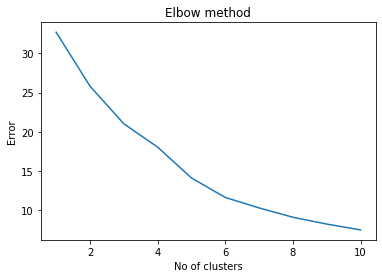

In [4]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(norm_X)
    kmeans.fit(norm_X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [5]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(norm_X)
print(y_kmeans2)

[0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1]


In [6]:
d = {'Cereal':df['name'], 'Cluster': y_kmeans2, 'Rating': df['rating'], 'Calories': df['calories'], 'Protein': df['protein'], 'Fat': df['fat'], 'Sodium': df['sodium'], 'Fiber': df['fiber'], 'Carbohydrates': df['carbo'], 'Sugars': df['sugars'], 'Potassium': df['potass'], 'Vitamins': df['vitamins']}
test = pd.DataFrame(data=d)

In [32]:
test.head()

,Cereal,Cluster,Rating,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins
0,100% Bran,0,68.402973,70,4,1,130,10.0,5.0,6.0,280.0,25
1,100% Natural Bran,1,33.983679,120,3,5,15,2.0,8.0,8.0,135.0,0
2,All-Bran,0,59.425505,70,4,1,260,9.0,7.0,5.0,320.0,25
3,All-Bran with Extra Fiber,0,93.704912,50,4,0,140,14.0,8.0,0.0,330.0,25
5,Apple Cinnamon Cheerios,1,29.509541,110,2,2,180,1.5,10.5,10.0,70.0,25


In [8]:
df['rating'].median()

40.2530865

In [9]:
cluster_1 = test[test['Cluster'] == 0]
med_1 = cluster_1['Rating'].median()
mean_1 = cluster_1['Rating'].mean()

print("Median of cluster 1: %f" %med_1)
print("Mean of cluster 1: %f" %mean_1)

Median of cluster 1: 50.764999
Mean of cluster 1: 52.573632


In [10]:
cluster_2 = test[test['Cluster'] == 1]
med_2 = cluster_2['Rating'].median()
mean_2 = cluster_2['Rating'].mean()

print("Median of cluster 2: %f" %med_2)
print("Mean of cluster 2: %f" %mean_2)

Median of cluster 2: 32.207582
Mean of cluster 2: 32.169942


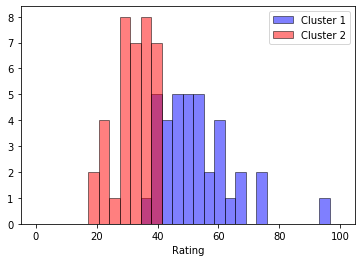

In [12]:
from matplotlib import pyplot

bins = np.linspace(0, 100, 30)

pyplot.hist(cluster_1['Rating'], bins, alpha=0.5,edgecolor='black', color = 'blue', label='Cluster 1')
pyplot.hist(cluster_2['Rating'], bins, alpha=0.5, edgecolor='black', color = 'red', label='Cluster 2')
pyplot.legend(loc='upper right')
pyplot.xlabel('Rating')
pyplot.show()

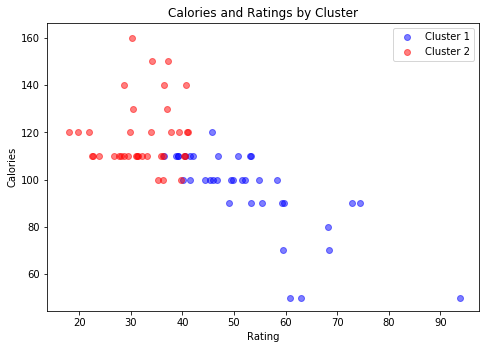

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Calories'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Calories'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Calories')
ax.set_title('Calories and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

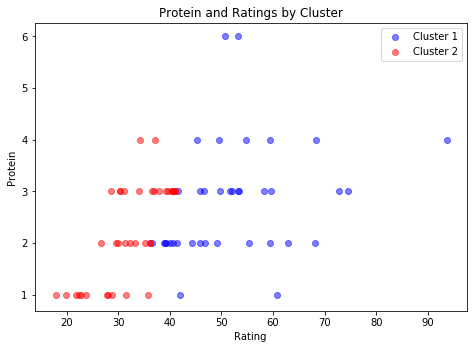

In [18]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Protein'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Protein'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Protein')
ax.set_title('Protein and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

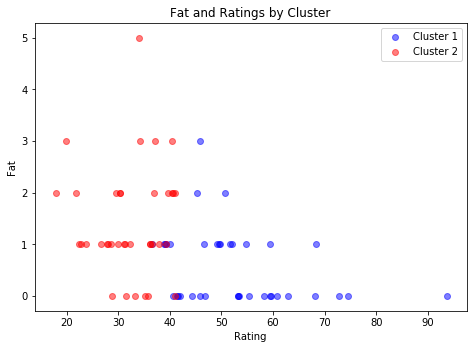

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Fat'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Fat'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Fat')
ax.set_title('Fat and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

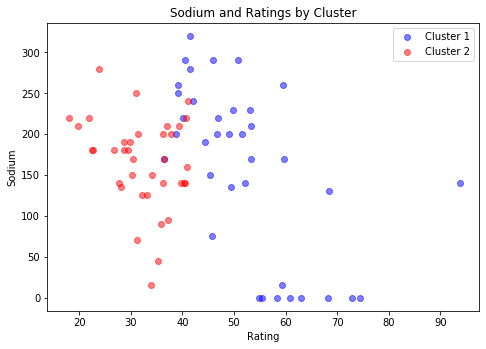

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Sodium'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Sodium'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Sodium')
ax.set_title('Sodium and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

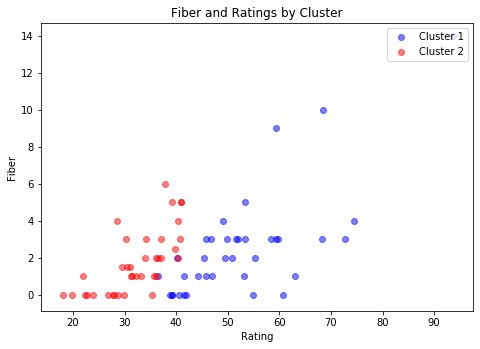

In [26]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Fiber'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Fiber'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Fiber')
ax.set_title('Fiber and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

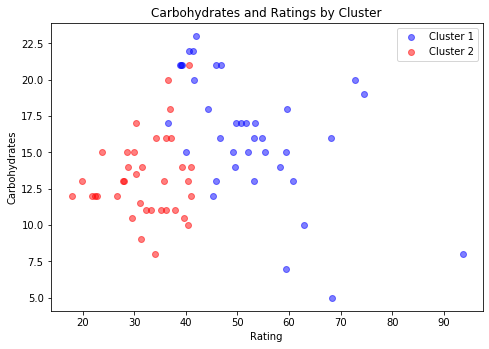

In [27]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Carbohydrates'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Carbohydrates'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Carbohydrates')
ax.set_title('Carbohydrates and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

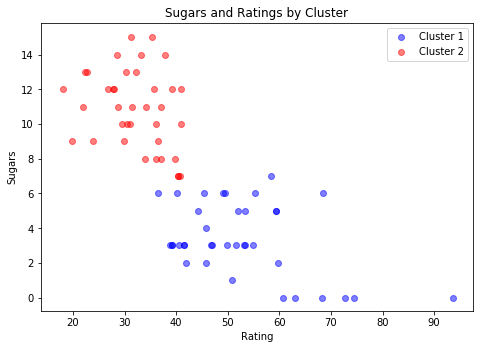

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Sugars'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Sugars'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Sugars')
ax.set_title('Sugars and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

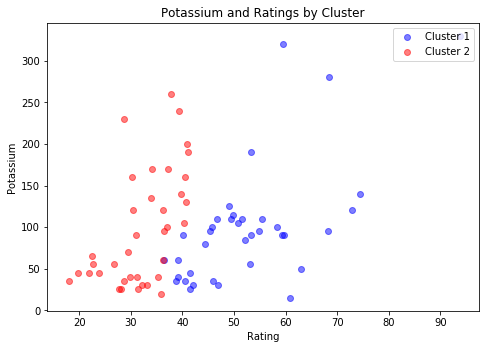

In [29]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Potassium'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Potassium'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Potassium')
ax.set_title('Potassium and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

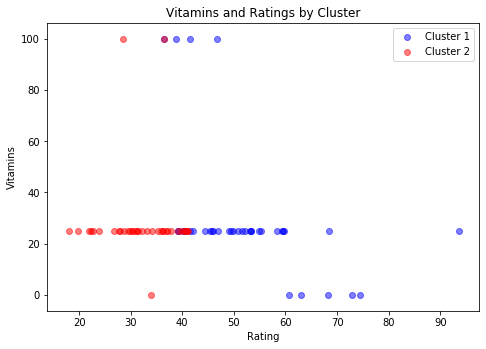

In [30]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(cluster_1['Rating'], cluster_1['Vitamins'], color='blue', alpha=0.5, label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Vitamins'], color='red', alpha=0.5, label='Cluster 2')
ax.set_xlabel('Rating')
ax.set_ylabel('Vitamins')
ax.set_title('Vitamins and Ratings by Cluster')
pyplot.legend(loc='upper right')
plt.show()

In [34]:
test_good = test.loc[test['Cluster'] == 0]
test_bad = test.loc[test['Cluster'] == 1]

In [58]:
# Sort by highest rating first
test_good = test_good.sort_values('Rating', ascending=False)
# Sort by lowest rating first
test_bad = test_bad.sort_values('Rating')

In [61]:
print("TOP 10 GOOD FOR YOU\n", test_good['Cereal'][0:10])
print("\n")
print("TOP 10 BAD FOR YOU\n", test_bad['Cereal'][0:10])

TOP 10 GOOD FOR YOU
 3     All-Bran with Extra Fiber
64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
0                     100% Bran
63               Shredded Wheat
55                 Puffed Wheat
54                  Puffed Rice
50            Nutri-grain Wheat
2                      All-Bran
68      Strawberry Fruit Wheats
Name: Cereal, dtype: object


TOP 10 BAD FOR YOU
 10             Cap'n'Crunch
12    Cinnamon Toast Crunch
35         Honey Graham Ohs
18            Count Chocula
14              Cocoa Puffs
31           Golden Grahams
42             Lucky Charms
73                     Trix
29           Fruity Pebbles
70        Total Raisin Bran
Name: Cereal, dtype: object
